# Punto 5

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [60]:
N = 100 # numero de puntos
x_Max = 10 # X maxima

In [61]:
t = np.linspace(0., x_Max , N)
h = t[1] - t[0]

In [62]:
def f(x,y,q):
    return y**q

In [63]:
def F1(x):
    return np.e**x

In [102]:
def F2(x,q):
    return (x*(1-q)+1)**(1/(1-q))

In [103]:
q_s = np.array([0.,0.2,0.4,0.7,0.9,1])

In [104]:
yext = np.zeros([len(q_s),len(t)])
for i in range(len(q_s)):
    yext[i][0] = 1

In [105]:
y = np.zeros([len(q_s),len(t)])

In [106]:
def GetEuler3(x,y,h,q_s):
    for j in range(len(q_s)):
        y[j][0] = 1
        for i in range(1,len(x)):
            k1 = f(x[i-1],y[j][i-1],q_s[j])
            k2 = f(x[i-1]+0.5*h,y[j][i-1] + 0.5*h*k1,q_s[j])
            k3 = f(x[i-1]+h,y[j][i-1]-h*k1+2*h*k2,q_s[j])
            y[j][i] = y[j][i-1] + (1/6)*h*(k1+4*k2+k3)

In [113]:
for j in range(len(q_s)-1):
    for i in range(len(t)):
        q = q_s[j]
        yext[j][i] = F2(t[i],q)

In [114]:
yext[-1][:] = F1(t[:])

In [115]:
yext[-1]

array([1.00000000e+00, 1.10628782e+00, 1.22387273e+00, 1.35395549e+00,
       1.49786447e+00, 1.65706921e+00, 1.83319548e+00, 2.02804182e+00,
       2.24359796e+00, 2.48206508e+00, 2.74587836e+00, 3.03773178e+00,
       3.36060565e+00, 3.71779709e+00, 4.11295363e+00, 4.55011049e+00,
       5.03373179e+00, 5.56875615e+00, 6.16064708e+00, 6.81544881e+00,
       7.53984798e+00, 8.34124196e+00, 9.22781435e+00, 1.02086186e+01,
       1.12936704e+01, 1.24940499e+01, 1.38220152e+01, 1.52911270e+01,
       1.69163875e+01, 1.87143934e+01, 2.07035054e+01, 2.29040358e+01,
       2.53384558e+01, 2.80316249e+01, 3.10110451e+01, 3.43071414e+01,
       3.79535725e+01, 4.19875748e+01, 4.64503425e+01, 5.13874480e+01,
       5.68493076e+01, 6.28916963e+01, 6.95763174e+01, 7.69714323e+01,
       8.51525577e+01, 9.42032371e+01, 1.04215893e+02, 1.15292773e+02,
       1.27546990e+02, 1.41103681e+02, 1.56101284e+02, 1.72692948e+02,
       1.91048105e+02, 2.11354190e+02, 2.33818566e+02, 2.58670631e+02,
      

In [116]:
GetEuler3(t,y,h,q_s)

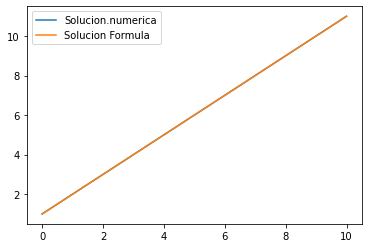

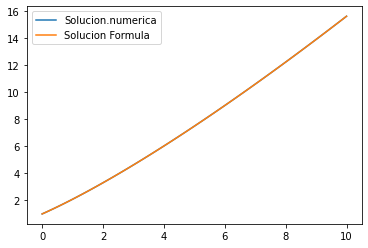

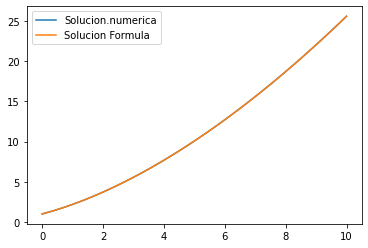

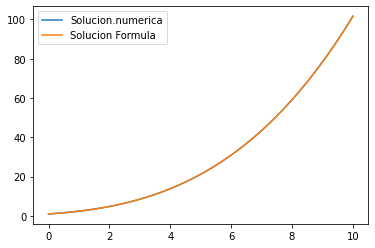

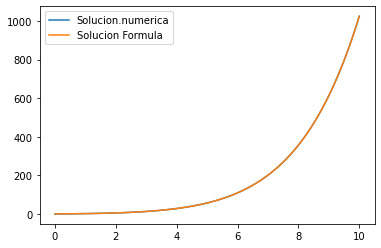

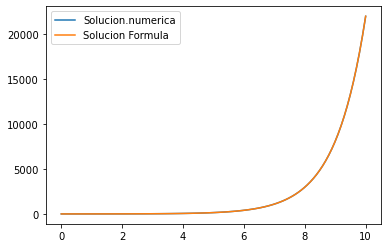

In [117]:
for i in range(len(q_s)):
    plt.plot(t,y[i], label = "Solucion.numerica")
    plt.plot(t,yext[i], label = "Solucion Formula")
    plt.legend()
    plt.show()